In [6]:
import pandas as pd
# 对starcoder数据进行分析
dataframe_input = pd.read_json("/home/liuchao/shushanfu/LMOps/data/HumanEval.jsonl",lines=True)
dataframe_7B_input_org = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/StarCoder-7B/org/org_org/human_eval/StarCoder-7B_1024_4_tm1_tp1_0_dofil0_end_prompt1_2.jsonl_results.jsonl",lines=True)
dataframe_1B_input_org = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/StarCoder-1B/org/org_org/human_eval/StarCoder-1B_1024_4_tm1_tp1_0_dofil0_end_prompt1_0.134.jsonl_results.jsonl",lines=True)
dataframe_1B_input_kdr = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/starcoder/kd_rkl/org_org/human_eval/13446_1024_64_tm1_tp1_0_dofil0_end_prompt1.jsonl_results.jsonl",lines=True)
dataframe_1B_input_kdo = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/starcoder/kd_our/org_org/human_eval/exchange_filter1/15687_1024_64_tm1_tp1_0_dofil0_end_prompt1.jsonl_results.jsonl",lines=True)


In [2]:
dataframe_7B_input_org.columns

Index(['task_id', 'completion', 'result', 'passed'], dtype='object')

In [3]:
# 1. dataframe_7B_input_org 中passed为true但dataframe_1B_input_kdo为False。
org_true_kdo_false = dataframe_7B_input_org[dataframe_7B_input_org['task_id'].isin(dataframe_1B_input_kdo['task_id'])]
org_true_kdo_false = org_true_kdo_false[(org_true_kdo_false['passed'] == True) & (org_true_kdo_false['task_id'].isin(dataframe_1B_input_kdo[dataframe_1B_input_kdo['passed'] == False]['task_id']))]

# 2. dataframe_1B_input_kdr为False，dataframe_1B_input_kdo为True
kdr_false_kdo_true = dataframe_1B_input_kdr[(dataframe_1B_input_kdr['passed'] == False) & (dataframe_1B_input_kdr['task_id'].isin(dataframe_1B_input_kdo[dataframe_1B_input_kdo['passed'] == True]['task_id']))]

# 3. dataframe_1B_input_org为True，dataframe_1B_input_kdo为True但dataframe_1B_input_kdr为False的内容
org_true_kdo_true_kdr_false = dataframe_1B_input_org[(dataframe_1B_input_org['passed'] == True) & 
                             (dataframe_1B_input_org['task_id'].isin(dataframe_1B_input_kdo[(dataframe_1B_input_kdo['passed'] == True) & 
                                                                                           (dataframe_1B_input_kdr['passed'] == False)]['task_id']))]

In [4]:
org_true_kdo_true_kdr_false

,task_id,completion,result,passed
49,HumanEval/49,"\n\ndef modp(n: int, p: int):\n """"""Return 2...",passed,True


In [5]:
dataframe_output = pd.read_json("codellama_python_human_eval_7b_all.jsonl_results.jsonl",lines=True)

/tmp/ipykernel_3155826/3303025906.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dataframe_output = pd.read_json("codellama_python_human_eval_7b_all.jsonl_results.jsonl",lines=True)


ValueError: Expected object or value

In [7]:
# 1. dataframe_7B_input_org 中id一样的内容，passed为true但dataframe_1B_input_kdo为False。
df1 = dataframe_7B_input_org[(dataframe_7B_input_org['passed'] == True) & 
                             (dataframe_7B_input_org['task_id'].isin(dataframe_1B_input_kdo[dataframe_1B_input_kdo['passed'] == False]['task_id']))]

df1 = df1.merge(dataframe_1B_input_kdo, on='task_id', suffixes=('_7B_org', '_kdo'))
df1 = df1[['task_id', 'completion_7B_org', 'passed_7B_org', 'completion_kdo', 'passed_kdo']]

# 2. dataframe_1B_input_kdr为False，dataframe_1B_input_kdo为True
df2 = dataframe_1B_input_kdr[(dataframe_1B_input_kdr['passed'] == False) & 
                             (dataframe_1B_input_kdr['task_id'].isin(dataframe_1B_input_kdo[dataframe_1B_input_kdo['passed'] == True]['task_id']))]

df2 = df2.merge(dataframe_1B_input_kdo, on='task_id', suffixes=('_kdr', '_kdo'))
df2 = df2[['task_id', 'completion_kdr', 'passed_kdr', 'completion_kdo', 'passed_kdo']]


In [8]:
df2

,task_id,completion_kdr,passed_kdr,completion_kdo,passed_kdo
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,False,from typing import List\n\n\ndef has_close_ele...,True
1,HumanEval/11,from typing import List\n\n\ndef string_xor(a:...,False,from typing import List\n\n\ndef string_xor(a:...,True
2,HumanEval/49,"def modp(n: int, p: int):\n """"""Return 2^n m...",False,"def modp(n: int, p: int):\n """"""Return 2^n m...",True
3,HumanEval/51,"def remove_vowels(text):\n """"""\n remove_...",False,"def remove_vowels(text):\n """"""\n remove_...",True
4,HumanEval/72,"def will_it_fly(q,w):\n '''\n Write a fu...",False,"def will_it_fly(q,w):\n '''\n Write a fu...",True
5,HumanEval/143,"def words_in_sentence(sentence):\n """"""\n ...",False,"def words_in_sentence(sentence):\n """"""\n ...",True
6,HumanEval/152,"def compare(game,guess):\n """"""I think we al...",False,"def compare(game,guess):\n """"""I think we al...",True


In [9]:
df2.to_csv("result_4.csv")

In [6]:
# 3. dataframe_7B_input_org 中id一样的内容，passed为true但dataframe_1B_input_org为False,而但dataframe_1B_input_kdo为True。
df3 = dataframe_7B_input_org[(dataframe_7B_input_org['passed'] == True) & 
                             (dataframe_7B_input_org['task_id'].isin(dataframe_1B_input_org[dataframe_1B_input_org['passed'] == False]['task_id'])) & 
                             (dataframe_7B_input_org['task_id'].isin(dataframe_1B_input_kdo[dataframe_1B_input_kdo['passed'] == True]['task_id']))]

# Merge with dataframe_1B_input_org
df3 = df3.merge(dataframe_1B_input_org, on='task_id', suffixes=('_7B_org', '_1B_org'))
# Merge with dataframe_1B_input_kdo (note: this merge needs a custom suffix handling)
df3 = df3.merge(dataframe_1B_input_kdo, on='task_id')
df3.rename(columns={'completion': 'completion_kdo', 'passed': 'passed_kdo'}, inplace=True)

# Rearrange columns to include the necessary ones with appropriate suffixes
df3 = df3[['task_id', 'completion_7B_org', 'passed_7B_org', 'completion_1B_org', 'passed_1B_org', 'completion_kdo', 'passed_kdo']]


In [7]:
df3

,task_id,completion_7B_org,passed_7B_org,completion_1B_org,passed_1B_org,completion_kdo,passed_kdo
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,True,from typing import List\n\n\ndef has_close_ele...,False,from typing import List\n\n\ndef has_close_ele...,True
1,HumanEval/18,"\n\ndef how_many_times(string: str, substring:...",True,"\n\ndef how_many_times(string: str, substring:...",False,"def how_many_times(string: str, substring: str...",True
2,HumanEval/22,"from typing import List, Any\n\n\ndef filter_i...",True,"from typing import List, Any\n\n\ndef filter_i...",False,"from typing import List, Any\n\n\ndef filter_i...",True
3,HumanEval/27,"\n\ndef flip_case(string: str) -> str:\n """"...",True,"\n\ndef flip_case(string: str) -> str:\n """"...",False,"def flip_case(string: str) -> str:\n """""" Fo...",True
4,HumanEval/34,"\n\ndef unique(l: list):\n """"""Return sorted...",True,"\n\ndef unique(l: list):\n """"""Return sorted...",False,"def unique(l: list):\n """"""Return sorted uni...",True
5,HumanEval/40,"\n\ndef triples_sum_to_zero(l: list):\n """"""...",True,"\n\ndef triples_sum_to_zero(l: list):\n """"""...",False,"def triples_sum_to_zero(l: list):\n """"""\n ...",True
6,HumanEval/47,"\n\ndef median(l: list):\n """"""Return median...",True,"\n\ndef median(l: list):\n """"""Return median...",False,"def median(l: list):\n """"""Return median of ...",True
7,HumanEval/60,"\n\ndef sum_to_n(n: int):\n """"""sum_to_n is ...",True,"\n\ndef sum_to_n(n: int):\n """"""sum_to_n is ...",False,"def sum_to_n(n: int):\n """"""sum_to_n is a fu...",True
8,HumanEval/72,"\ndef will_it_fly(q,w):\n '''\n Write a ...",True,\n,False,"def will_it_fly(q,w):\n '''\n Write a fu...",True
9,HumanEval/143,"\ndef words_in_sentence(sentence):\n """"""\n ...",True,"\ndef words_in_sentence(sentence):\n """"""\n ...",False,"def words_in_sentence(sentence):\n """"""\n ...",True


In [8]:
df1

NameError: name 'df1' is not defined

In [9]:
df2

NameError: name 'df2' is not defined

In [10]:
def print_diff(dataframe:pd.DataFrame,index:int,*strs):
    for strTemp in strs:

        print(dataframe.iloc[index,:]["completion_" + strTemp])
        print("-----------------------")
    

In [11]:
df3

,task_id,completion_7B_org,passed_7B_org,completion_1B_org,passed_1B_org,completion_kdo,passed_kdo
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,True,from typing import List\n\n\ndef has_close_ele...,False,from typing import List\n\n\ndef has_close_ele...,True
1,HumanEval/18,"\n\ndef how_many_times(string: str, substring:...",True,"\n\ndef how_many_times(string: str, substring:...",False,"def how_many_times(string: str, substring: str...",True
2,HumanEval/22,"from typing import List, Any\n\n\ndef filter_i...",True,"from typing import List, Any\n\n\ndef filter_i...",False,"from typing import List, Any\n\n\ndef filter_i...",True
3,HumanEval/27,"\n\ndef flip_case(string: str) -> str:\n """"...",True,"\n\ndef flip_case(string: str) -> str:\n """"...",False,"def flip_case(string: str) -> str:\n """""" Fo...",True
4,HumanEval/34,"\n\ndef unique(l: list):\n """"""Return sorted...",True,"\n\ndef unique(l: list):\n """"""Return sorted...",False,"def unique(l: list):\n """"""Return sorted uni...",True
5,HumanEval/40,"\n\ndef triples_sum_to_zero(l: list):\n """"""...",True,"\n\ndef triples_sum_to_zero(l: list):\n """"""...",False,"def triples_sum_to_zero(l: list):\n """"""\n ...",True
6,HumanEval/47,"\n\ndef median(l: list):\n """"""Return median...",True,"\n\ndef median(l: list):\n """"""Return median...",False,"def median(l: list):\n """"""Return median of ...",True
7,HumanEval/60,"\n\ndef sum_to_n(n: int):\n """"""sum_to_n is ...",True,"\n\ndef sum_to_n(n: int):\n """"""sum_to_n is ...",False,"def sum_to_n(n: int):\n """"""sum_to_n is a fu...",True
8,HumanEval/72,"\ndef will_it_fly(q,w):\n '''\n Write a ...",True,\n,False,"def will_it_fly(q,w):\n '''\n Write a fu...",True
9,HumanEval/143,"\ndef words_in_sentence(sentence):\n """"""\n ...",True,"\ndef words_in_sentence(sentence):\n """"""\n ...",False,"def words_in_sentence(sentence):\n """"""\n ...",True


In [14]:
print_diff(df3,7,"7B_org","1B_org","kdo")



def sum_to_n(n: int):
    """sum_to_n is a function that sums numbers from 1 to n.
    >>> sum_to_n(30)
    465
    >>> sum_to_n(100)
    5050
    >>> sum_to_n(5)
    15
    >>> sum_to_n(10)
    55
    >>> sum_to_n(1)
    1
    """
    # Write your code here.
    sum = 0
    for i in range(1, n+1):
        sum += i
    return sum

def sum_to_n_v2(n: int):
    """sum_to_n_v2 is a function that sums numbers from 1 to n.
    >>> sum_to_n_v2(30)
    465
    >>> sum_to_n_v2(100)
    5050
    >>> sum_to_n_v2(5)
    15
    >>> sum_to_n_v2(10)
    55
    >>> sum_to_n_v2(1)
    1
    """
    # Write your code here.
    return n * (n + 1) // 2

def sum_to_n_v3(n: int):
    """sum_to_n_v3 is a function that sums numbers from 1 to n.
    >>> sum_to_n_v3(30)
    465
    >>> sum_to_n_v3(100)
    5050
    >>> sum_to_n_v3(5)
    15
    >>> sum_to_n_v3(10)
    55
    >>> sum_to_n_v3(1)
    1
    """
    # Write your code here.
    return n * (n + 1) // 2

def sum_to_n_v4(n: int):
    """sum_to_n_v4 i

In [57]:
# 3. dataframe_7B_input_org 中id一样的内容，passed为true,dataframe_1B_input_org为True,而dataframe_1B_input_kdo为False。
df4 = dataframe_7B_input_org[(dataframe_7B_input_org['passed'] == True) & 
                             (dataframe_7B_input_org['task_id'].isin(dataframe_1B_input_org[dataframe_1B_input_org['passed'] == True]['task_id'])) & 
                             (dataframe_7B_input_org['task_id'].isin(dataframe_1B_input_kdo[dataframe_1B_input_kdo['passed'] == False]['task_id']))]

df4 = df4.merge(dataframe_1B_input_org, on='task_id', suffixes=('_7B_org', '_1B_org'))
df4 = df4.merge(dataframe_1B_input_kdo, on='task_id')
df4.rename(columns={'completion': 'completion_kdo', 'passed': 'passed_kdo'}, inplace=True)

df4 = df4[['task_id', 'completion_7B_org', 'passed_7B_org', 'completion_1B_org', 'passed_1B_org', 'completion_kdo', 'passed_kdo']]


In [58]:
df4

,task_id,completion_7B_org,passed_7B_org,completion_1B_org,passed_1B_org,completion_kdo,passed_kdo


In [1]:
# 统计测试用例的数量
import json
import pandas as pd
import matplotlib.pyplot as plt
import re

# 读取JSONL文件
file_path = 'data/HumanEval.jsonl'

task_data = []

assert_candidate_pattern = re.compile(r'^\s*assert.*candidate', re.MULTILINE)
assert_candidate_pattern_2 = re.compile(r'^\s*assert.*', re.MULTILINE)

with open(file_path, 'r') as file:
    for line in file:
        data = json.loads(line)
        task_id = data['task_id']
        test_code = data['test']
        test_code_no_comments = "\n".join([line for line in test_code.split("\n") if not line.strip().startswith("#")])

        assert_count = len(assert_candidate_pattern_2.findall(test_code_no_comments))

        assert_candidate_count = len(assert_candidate_pattern.findall(test_code_no_comments))

        # 统计assert出现的次数
        # assert_count = test_code.count('assert')
        task_data.append({
            'task_id': task_id,
            'assert_count': assert_candidate_count,
            'assert_count_2': assert_count
        })

# 将数据转换为DataFrame
df = pd.DataFrame(task_data)

# 解析task_id，提取HumanEval/x中的x
df['task_number'] = df['task_id'].str.extract(r'HumanEval/(\d+)').astype(int)

# 按task_number排序
df.sort_values(by='task_number', inplace=True)


In [2]:
df['assert_count'] = df['assert_count'].replace(0, 1)


In [3]:
df

,task_id,assert_count,assert_count_2,task_number
0,HumanEval/0,7,7,0
1,HumanEval/1,4,4,1
2,HumanEval/2,3,3,2
3,HumanEval/3,6,6,3
4,HumanEval/4,3,3,4
...,...,...,...,...
159,HumanEval/159,6,8,159
160,HumanEval/160,3,4,160
161,HumanEval/161,8,8,161
162,HumanEval/162,4,5,162


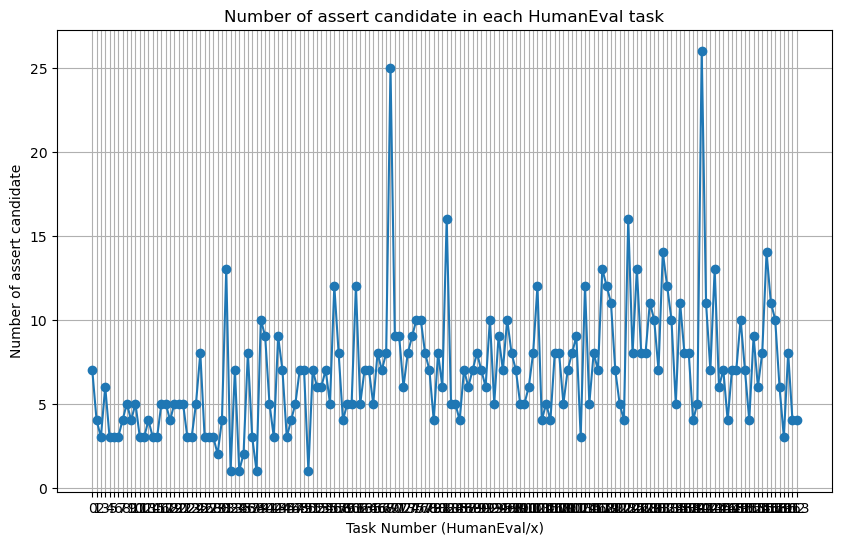

In [4]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(df['task_number'], df['assert_count'], marker='o', linestyle='-')
plt.xlabel('Task Number (HumanEval/x)')
plt.ylabel('Number of assert candidate')
plt.title('Number of assert candidate in each HumanEval task')
plt.grid(True)
plt.xticks(df['task_number'])
plt.show()


In [5]:
df['assert_count'].mean()

6.908536585365853

In [73]:
df['assert_count_2'].mean()

7.201219512195122

In [79]:
mask = df['assert_count'] != df['assert_count_2']

# 根据mask筛选出不同的task_id
unique_task_ids = df.loc[mask, 'task_id'].unique()

In [80]:
unique_task_ids

array(['HumanEval/32', 'HumanEval/64', 'HumanEval/66', 'HumanEval/68',
       'HumanEval/70', 'HumanEval/74', 'HumanEval/79', 'HumanEval/81',
       'HumanEval/83', 'HumanEval/84', 'HumanEval/86', 'HumanEval/87',
       'HumanEval/88', 'HumanEval/90', 'HumanEval/91', 'HumanEval/98',
       'HumanEval/100', 'HumanEval/101', 'HumanEval/104', 'HumanEval/105',
       'HumanEval/108', 'HumanEval/113', 'HumanEval/115', 'HumanEval/116',
       'HumanEval/118', 'HumanEval/128', 'HumanEval/134', 'HumanEval/136',
       'HumanEval/137', 'HumanEval/145', 'HumanEval/152', 'HumanEval/155',
       'HumanEval/156', 'HumanEval/159', 'HumanEval/160', 'HumanEval/162',
       'HumanEval/163'], dtype=object)

In [110]:
import json
import re
import pandas as pd

# 假设数据保存在一个JSON文件中
file_path = "/home/liuchao/shushanfu/LMOps/data/mbpp_prompt/test.json"

# 读取JSON文件
with open(file_path, 'r') as file:
    data = json.load(file)

# 定义正则表达式来匹配测试用例
test_case_pattern = re.compile(r'>>> .+')

# 创建一个列表来存储统计结果
stats = []

# 遍历每个数据条目
for entry in data:
    task_id = entry['task_id']
    prompt = entry['prompt']
    
    # 找到所有匹配的测试用例
    test_cases = test_case_pattern.findall(prompt)
    test_case_count = len(test_cases)
    
    stats.append({
        'task_id': task_id,
        'test_case_count': test_case_count
    })

# 将统计结果转换为DataFrame
df_2 = pd.DataFrame(stats)

In [115]:
df_2

,task_id,test_case_count
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
495,495,3
496,496,3
497,497,3
498,498,3


In [114]:
df_2['test_case_count'].min()

1

In [117]:
task_id_with_max_assert_count = df_2[df_2['test_case_count'] == 1]['task_id']

# 打印结果
print("最大assert_count对应的task_id是:", task_id_with_max_assert_count.tolist())

最大assert_count对应的task_id是: [482]


In [118]:
df_2['test_case_count'].mean()

2.996

In [119]:
file_path = 'data/HumanEval.jsonl'
dataframe_1 = pd.read_json(file_path,lines=True)

In [120]:
dataframe_1

,task_id,prompt,entry_point,canonical_solution,test
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,has_close_elements,"for idx, elem in enumerate(numbers):\n ...","\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups,result = []\n current_string = []\n ...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number,return number % 1.0\n,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,below_zero,balance = 0\n\n for op in operations:\n...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,mean_absolute_deviation,mean = sum(numbers) / len(numbers)\n re...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
...,...,...,...,...,...
159,HumanEval/159,"\ndef eat(number, need, remaining):\n """"""\n...",eat,if(need <= remaining):\n return [ n...,def check(candidate):\n\n # Check some simp...
160,HumanEval/160,"\ndef do_algebra(operator, operand):\n """"""\...",do_algebra,expression = str(operand[0])\n for oprt...,def check(candidate):\n\n # Check some simp...
161,HumanEval/161,"\ndef solve(s):\n """"""You are given a string...",solve,flg = 0\n idx = 0\n new_str = list(s...,def check(candidate):\n\n # Check some simp...
162,HumanEval/162,"\ndef string_to_md5(text):\n """"""\n Given...",string_to_md5,import hashlib\n return hashlib.md5(tex...,def check(candidate):\n\n # Check some simp...


In [124]:
print(dataframe_1.iloc[0,:]['prompt'])

from typing import List


def has_close_elements(numbers: List[float], threshold: float) -> bool:
    """ Check if in given list of numbers, are any two numbers closer to each other than
    given threshold.
    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)
    False
    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)
    True
    """



In [ ]:
from typing import List


def has_close_elements(numbers: List[float], threshold: float) -> bool:
    """ Check if in given list of numbers, are any two numbers closer to each other than
    given threshold.
    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)
    False
    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)
    True
    """

In [2]:
test = "sum_to_n is a function that sums numbers from 1 to n."

In [4]:
len(test.split())

11

In [5]:
test.split()

['sum_to_n',
 'is',
 'a',
 'function',
 'that',
 'sums',
 'numbers',
 'from',
 '1',
 'to',
 'n.']

In [32]:
import pandas as pd
from datasets import load_dataset
# 对starcoder数据进行分析
dataframe_input = pd.read_json("/home/liuchao/shushanfu/LMOps/data/HumanEval.jsonl",lines=True)
dataframe_7B_input_org = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/StarCoder-7B/org/org_org/human_eval/StarCoder-7B_1024_4_tm1_tp1_0_dofil0_end_prompt1_2.jsonl_results.jsonl",lines=True)
dataframe_1B_input_org = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/StarCoder-1B/org/org_org/human_eval/StarCoder-1B_1024_4_tm1_tp1_0_dofil0_end_prompt1_0.134.jsonl_results.jsonl",lines=True)
dataframe_1B_input_kdr = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/starcoder/kd_rkl/org_org/human_eval/13446_1024_64_tm1_tp1_0_dofil0_end_prompt1.jsonl_results.jsonl",lines=True)
dataframe_1B_input_kdo = pd.read_json("/home/liuchao/shushanfu/LMOps/data/evaluate/starcoder/kd_our/org_org/human_eval/exchange_filter1/15687_1024_64_tm1_tp1_0_dofil0_end_prompt1.jsonl_results.jsonl",lines=True)
dataframe_mbpp = load_dataset("/home/liuchao/shushanfu/LMOps/data/mbpp_prompt")['test'].to_pandas()

In [12]:
def print_row_info(df, row_index):
    """
    打印指定行的所有列的信息
    """
    if row_index < 0 or row_index >= len(df):
        print("Invalid row index")
        return
    
    row_data = df.iloc[row_index]
    for column, value in row_data.items():
        print(f"{column}:\n {value}")

def print_completion_info(df1, df2, row_index):
    """
    打印指定行的 completion 列的信息
    """
    if row_index < 0 or row_index >= len(df1) or row_index >= len(df2):
        print("Invalid row index")
        return
    
    completion1 = df1.at[row_index, 'completion'] if 'completion' in df1.columns else None
    completion2 = df2.at[row_index, 'completion'] if 'completion' in df2.columns else None
    
    print(f"DataFrame 1, Row {row_index}, Completion:\n{completion1}")
    print("-----------------------------------")
    print(f"DataFrame 2, Row {row_index}, Completion:\n{completion2}")

In [25]:
print_completion_info(dataframe_1B_input_kdr,dataframe_1B_input_kdo,row_index=152)

DataFrame 1, Row 152, Completion:
def compare(game,guess):
    """I think we all remember that feeling when the result of some long-awaited
    event is finally known. The feelings and thoughts you have at that moment are
    definitely worth noting down and comparing.
    Your task is to determine if a person correctly guessed the results of a number of matches.
    You are given two arrays of scores and guesses of equal length, where each index shows a match. 
    Return an array of the same length denoting how far off each guess was. If they have guessed correctly,
    the value is 0, and if not, the value is the absolute difference between the guess and the score.
    
    
    example:

    compare([1,2,3,4,5,1],[1,2,3,4,2,-2]) -> [0,0,0,0,3,3]
    compare([0,5,0,0,0,4],[4,1,1,0,0,-2]) -> [4,4,1,0,0,6]
    """

    # your code here
    # your code here
    # your code here
    # your code here
    # your code here
    # your code here
    # your code here
    # your code here
    

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

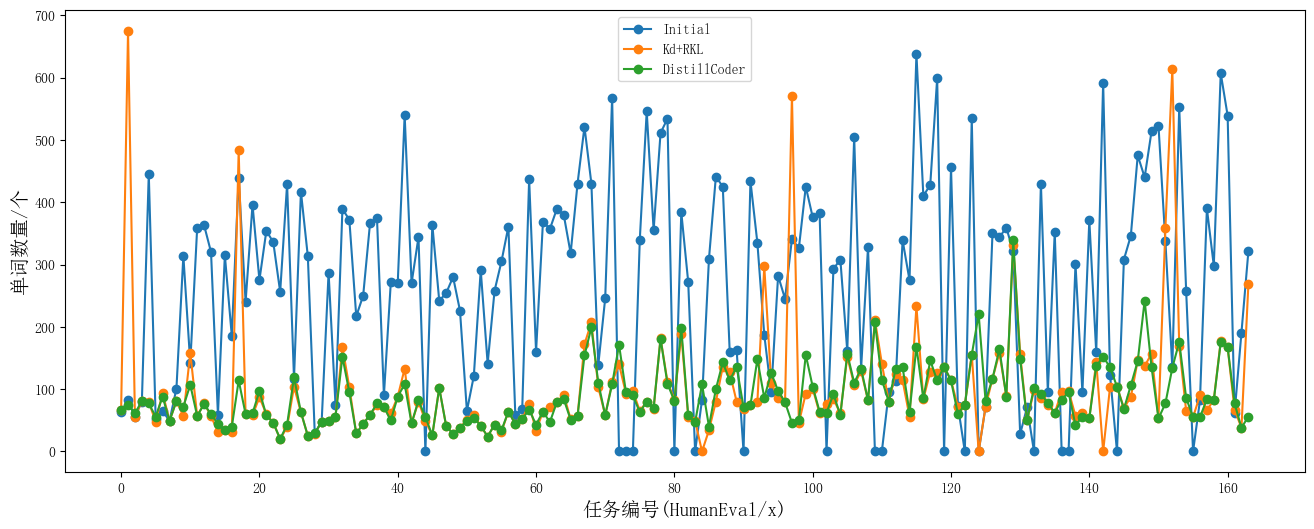

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman, SimSun'
plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 计算 completion 字段单词长度
def calculate_word_lengths(df):
    lengths = df['completion'].apply(lambda x: len(str(x).split())).tolist()
    return lengths


# 计算 completion 字段单词长度
lengths1 = calculate_word_lengths(dataframe_1B_input_org)
lengths2 = calculate_word_lengths(dataframe_1B_input_kdr)
lengths3 = calculate_word_lengths(dataframe_1B_input_kdo)

# 绘制折线图
plt.figure(figsize=(16, 6))
plt.plot(lengths1, label='Initial', marker='o')
plt.plot(lengths2, label='Kd+RKL', marker='o')
plt.plot(lengths3, label='DistillCoder', marker='o')
plt.xlabel('任务编号(HumanEval/x)',fontsize=14)
plt.ylabel('单词数量/个',fontsize=14)
# plt.title('Word Count of Completion Field in DataFrames')
plt.legend()
# plt.grid(True)
plt.show()